# Formular la pregunta

### "¿Cuál es la probabilidad que un tweet que origina dentro de los coordinados geográficos (-78.31, 0.44, -70.71, 11.39) contiene al menos una ocurrencia de la palabra 'yo' con cualquier composición de acentos y letras minúsculas y mayúsculas."

![](http://mediossociales.es/wp-content/uploads/2012/01/twitter_futbol12.jpg)

# Recopilar datos

In [4]:
import os

import tweepy
from tweepy import Stream

from stream_listener import FiniteStreamListener

### Cargar credenciales

In [5]:
CONSUMER_KEY = 'insert here'
CONSUMER_SECRET = 'insert here'
ACCESS_TOKEN = 'insert here'
ACCESS_TOKEN_SECRET = 'insert here'

In [6]:
COLOMBIA_GEO_LOCATION_BOUNDING_BOX = [-78.31, 0.44, -70.71, 11.39]
NUMBER_OF_TWEETS = 100

In [7]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

### Establecer una conexión al API de Twitter

In [8]:
finite_stream_listener = FiniteStreamListener(number_of_tweets=NUMBER_OF_TWEETS)
streaming_api = Stream(auth=auth, listener=finite_stream_listener)

### Sorber del firehouse

In [9]:
streaming_api.filter(locations=COLOMBIA_GEO_LOCATION_BOUNDING_BOX)

# Limpiar datos

In [11]:
!pip install unidecode

  Using cached https://files.pythonhosted.org/packages/59/ef/67085e30e8bbcdd76e2f0a4ad8151c13a2c5bce77c85f8cad6e1f16fb141/Unidecode-1.0.22-py2.py3-none-any.whl


In [12]:
from unidecode import unidecode

### Definir funciones de limpieza

In [13]:
def make_lowercase(tweet):
    return tweet.lower()


def remove_diacritics(tweet):
    return unidecode(tweet)


def remove_non_alpha_characters(tweet):
    return ''.join(character for character in tweet if character.isalpha() or character == ' ')

### Aplicar las funciones

In [14]:
cleaned_tweets = list(finite_stream_listener.tweets)

for cleaning_function in [make_lowercase, remove_diacritics, remove_non_alpha_characters]:
    cleaned_tweets = [cleaning_function(tweet) for tweet in cleaned_tweets]

# Dormir con tus datos

In [16]:
%matplotlib inline

from pprint import pprint
import pandas as pd

In [34]:
KEYWORD = 'yo'

### Primeros 10 tweets

In [35]:
pprint(cleaned_tweets[:10])

['disisietezabdiel solo anhelo abrazarte algun dia y se cumplira lo se '
 'itsjoelpimentel cncomusic httpstcoxbbvasunbf',
 'pero que es este clima de mierda en medellin mero lapo y ya dizque mero sol '
 'estamos es jodiendo',
 'importante escrito que demustra la mitomania o pseudologia fantastica que '
 'sufre uribe anos mintiendole al pais httpstcogrewssky',
 'vuelven los uribenos las masacres la corrupcion los ataques a la justicia '
 'los gremios a manejar el orden publi httpstcogvskaecnw',
 'a quien conozco en medellin que sea bueno o buena community manager y tenga '
 'una hoja de vida que valga la pena co httpstcovjybntts',
 ' bquilla en barranquilla httpstcotqypjkky',
 'saraireyesm jajajajjajaja la amo o o o o',
 'soleada la tarde en ciudad la concepcion chiriqui httpstcojcyrsmkrs',
 'zjhondroidyt yo estoy interesado pero mas o menos de que va la animacion ',
 'diesiochozabdiel solo anhelo abrazarte algun dia y se cumplira lo se '
 'itsjoelpimentel cncomusic httpstcoggaitoj']


### ¿Cuantas veces aparece la palabra clave?

In [36]:
number_of_occurences = sum(KEYWORD in tweet for tweet in cleaned_tweets)
print('Nuestra palabra clave aparece: {} veces'.format(number_of_occurences))

Nuestra palabra clave aparece: 6 veces


### ¿Con cual frecuencia apareció?

In [31]:
print('Nuestra palabra clave apareció en: {}% de los tweets'.format(100 * number_of_occurences/NUMBER_OF_TWEETS))

Nuestra palabra clave apareció en: 5.0% de los tweets


### ¿Cómo son los tweets que la contienen?

In [37]:
pprint([tweet for tweet in cleaned_tweets if KEYWORD in tweet])

['zjhondroidyt yo estoy interesado pero mas o menos de que va la animacion ',
 'yoooooooo',
 'hola tvnradio ludwiktapia sinestres quieroescuchar la cancion sevuelveloca '
 'de cncomusic saludos para cncopanama apoyocncopa',
 'luismorales pero yo se que ya una empresa se gano la licitacion para el '
 'arreglo y hacer unos puentes  pero si httpstcofjbcehun',
 'kiddpoio yo',
 'im at urbanizacion los criollitos in san cristobal tachira httpstcoembdjnyo']


### ¿Cuál es la distancia promedia entre ocurrencias consecutivas?

In [38]:
indices_of_tweets_containing_keyword = [index for index, tweet in enumerate(cleaned_tweets) if KEYWORD in tweet]

In [39]:
indices_of_tweets_containing_keyword

[8, 26, 46, 63, 89, 92]

In [40]:
distances_between_indices_of_tweets_containing_keyword = [
    second_index - first_index for first_index, second_index in \
        zip(indices_of_tweets_containing_keyword[:-1], indices_of_tweets_containing_keyword[1:])
]

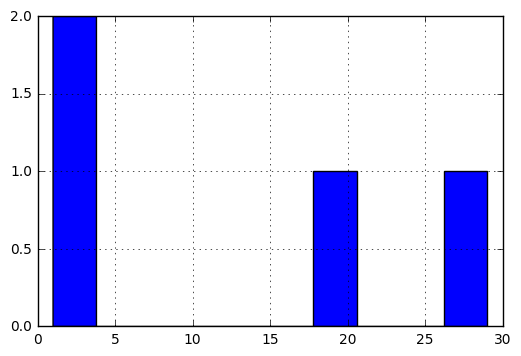

In [53]:
pd.Series(distances_between_indices_of_tweets_containing_keyword).hist()

# Construir un modelo

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta as beta_distribution

### Definir los parámetros de un Beta Distribution

In [2]:
alpha = 1 + number_of_occurences
beta = 1 + (NUMBER_OF_TWEETS - number_of_occurences)

x_values = np.linspace(0, 1, 1002)[1:-1]
pdf_y_values = beta_distribution(alpha, beta).pdf(x_values)
cdf_y_values = np.cumsum(pdf_y_values) / np.sum(pdf_y_values)

NameError: name 'number_of_occurences' is not defined

### Visualizar

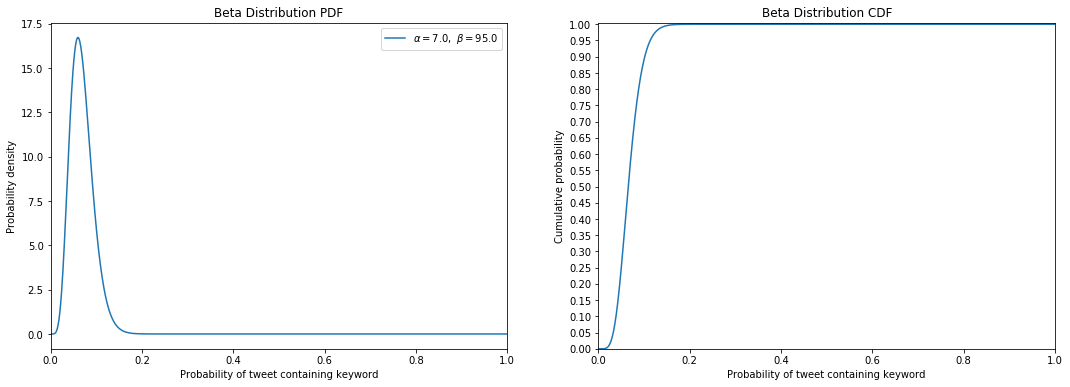

In [43]:
plt.figure(figsize=(18, 6))

# PDF
plt.subplot(121)

plt.plot(x_values, pdf_y_values, label=(r'$\alpha=%.1f,\ \beta=%.1f$' % (alpha, beta)))

plt.xlim(0, 1)
plt.xlabel('Probability of tweet containing keyword')
plt.ylabel('Probability density')
plt.title('Beta Distribution PDF')
plt.legend(loc=1)


# CDF
plt.subplot(122)

plt.plot(x_values, cdf_y_values)

plt.xlim(0, 1)
plt.ylim(0, 1.005)
plt.yticks(np.linspace(0, 1, 21))
plt.xlabel('Probability of tweet containing keyword')
plt.ylabel('Cumulative probability')
plt.title('Beta Distribution CDF')

plt.show()

# Comunicar resultados

### Con 90% de certeza, digamos que la verdadera probabilidad:

In [1]:
fifth_percentile = max(
    [x_value for x_value, y_value in zip(x_values, cdf_y_values) if y_value <= .05]
)

ninety_fifth_percentile = max(
    [x_value for x_value, y_value in zip(x_values, cdf_y_values) if y_value <= .95]
)

NameError: name 'x_values' is not defined

In [14]:
print('Con 90% de certeza digamos que la verdadera probabilidad se encuentra entre: {} y {}'.format(
    round(fifth_percentile, 4), round(ninety_fifth_percentile, 4)))

Con 90% de certeza digamos que la verdadera probabilidad se encuentra entre: 0.025 y 0.0999


### La probabilidad que la verdadera probabilidad (de que un tweet contiene nuesta palabra clave) sea más grande de .1:

In [16]:
def compute_total_probability_that_probability_less_than_p(p):
    return max(cumulative_prob for cumulative_prob, x_value in zip(cdf_y_values, x_values) if x_value < p)

In [17]:
print('La probabilidad que la verdadera probabilidad es > .1 es: {}'.format(
    1 - compute_total_probability_that_probability_less_than_p(.1))
)

La probabilidad que la verdadera probabilidad es > .1 es: 0.05283081449236815
